In [2]:
#2.4
#Author: Trent Rabe with help from Connor Marrs 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

from random import seed
from random import random
from random import uniform

def cov_fract_brownian_motion(x,y,H):
    return x**(2*H)+y**(2*H)-abs(x-y)**(2*H)

def create_path(cov_function,H,N):
    # compute the covariance matrix
    cov_matrix = np.array(
      [[ cov_function(.01*i,.01*j,H) for j in range(1,N+1)] for i in range(1,N+1)]
    )
    
    arraya = np.linalg.cholesky(cov_matrix)
    
    stand_vec = np.random.standard_normal(N)
    walk = np.matmul(arraya,stand_vec)
    
    return np.insert(walk,0,0)

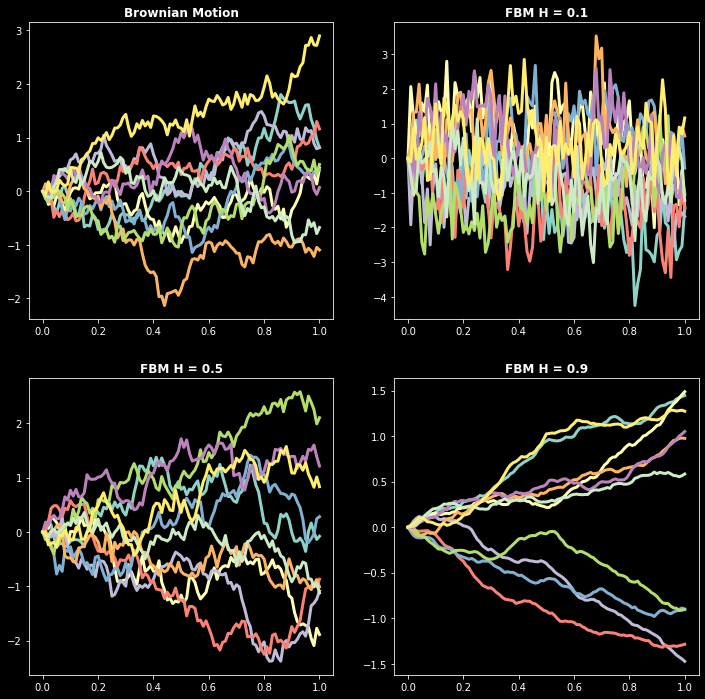

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import random

plt.style.use("dark_background")

num_lines = 10

f = plt.figure(figsize = (12,12))
ax = f.add_subplot(2,2,1)
ax1 = f.add_subplot(2,2,2)
ax2 = f.add_subplot(2,2,3)
ax3 = f.add_subplot(2,2,4)

lstX = []
for k in range(0,101):
    lstX.append(.01 * k)

for i in range(num_lines):
    ax.plot(lstX,create_path(cov_fract_brownian_motion,0.5,100), linewidth = 3)
ax.set_title("Brownian Motion", fontweight="bold")
for i in range(num_lines):
    ax1.plot(lstX,create_path(cov_fract_brownian_motion,0.1,100), linewidth = 3)
ax1.set_title("FBM H = 0.1", fontweight="bold")
for i in range(num_lines):
    ax2.plot(lstX,create_path(cov_fract_brownian_motion,0.5,100), linewidth = 3)
ax2.set_title("FBM H = 0.5", fontweight="bold")
for i in range(num_lines):
    ax3.plot(lstX,create_path(cov_fract_brownian_motion,0.9,100), linewidth = 3)
ax3.set_title("FBM H = 0.9", fontweight="bold")   
# plt.show()
plt.savefig('FBM.jpeg', bbox_inches='tight', pad_inches=.1)